# Анализ выручки интернет-магазина

## Описание проекта

Цель проекта:

1. Приоритизировать гипотезы;
2. Запустить A/B-тест;
3. Проанализировать результаты.

Задачи проекта:

1. Первая часть:

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

2. Вторая часть. Анализ A/B-теста:

* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
* Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


## Описание данных

Файл /datasets/hypothesis.csv

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st
from math import factorial
import datetime as dt

### Приоритизация гипотез

In [2]:
try:
    hypothesis = pd.read_csv('//Users/Elena/Desktop/hypothesis.csv')
except:
    hypothesis = pd.read_csv('/Documents/hypothesis.csv')

pd.options.display.max_colwidth = 150

hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


 Выведу данные таблицы, которая содержит гипотезы 'hypothesis'. 

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()

Приведу название столбцов к нижнему регистру.

In [4]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Чтобы улучшение ключевых метрик бизнеса, приоритизируем имеющиеся гипотезы.
Сначала методом 'ICE': умножим влияние на уверенность в результате и делим на затраты.
Наиболее приоритетной гипотезой оказывается 'Запустить акцию, дающую скидку на товар в день рождения'.

In [6]:
hypothesis['RICE'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритизируем гипотезы методом 'RICE': перемножим количество пользователей, которых затронут изменения, показатель влияния изменений на поведение пользователей и показатель уверенности в результате и поделим произведение на затраты.
В данном случае наиболее приоритетной гипотезой оказалась гипотеза: 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.

#### Вывод по первой части:

Оба метода 'RICE' и 'ICE' созданы для определения приоритетной гипотезы для тестирования. Основным отличием данных метрик является охват - количество пользователей, участвующих в тестировании. 
Предлагаю в данном анализе не пренебрегать данным показателем и выбрать, соответственно, гипотезу для тестирования 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'. 

### Анализ A/B-теста

In [7]:
try:
    orders = pd.read_csv('//Users/Elena/Desktop/orders.csv')
except:
    orders = pd.read_csv('/Documents/orders.csv')
    
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Ознакомимся с данными в таблице заказов 'orders'.

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 5 столбцов.

In [9]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

Приведу столбец с датой в необходимый формат.

In [10]:
try:
    visitors = pd.read_csv('//Users/Elena/Desktop/visitors.csv')
except:
    visitors = pd.read_csv('/Documents/visitors.csv')
    
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Так не выгрузим таблице с посетителями 'visitors'.

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Таблица состоит из 3 столбцов.

In [12]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')

Формат даты так же указан не верно. Изменю.

In [13]:
hypothesis.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

In [15]:
orders.duplicated().sum()

0

Проверила на наличие дубликатов, отсутствуют.

In [16]:
orders.groupby('group').agg({'group': 'count'})

,group
group,
A,557
B,640


В группу А попало 557 респандентов, в группу В чуть больше - 640.

In [17]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [18]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

Дата начала теста 01 августа 2019 года. Окончания - 31 августа 2019 года. Всего месяц. Это очень мало для тестирования гипотез.

In [19]:
hypothesis.describe()

,reach,impact,confidence,efforts,ICE,RICE
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889,6.797778,31.577778
std,3.153481,3.192874,3.045944,2.803767,5.817046,35.864390
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,3.000000,3.000000,3.000000,3.000000,1.330000,4.000000
50%,3.000000,3.000000,7.000000,5.000000,7.000000,16.200000
75%,8.000000,7.000000,8.000000,6.000000,11.200000,40.000000
max,10.000000,10.000000,9.000000,10.000000,16.200000,112.000000


Вывела описательную статистику по датафрейму с гипотезами. 1. Cреднее значение показателя 'reach' (охват) около 4,7 из 10. Не очень то большой. 2. Cреднее значение показателя 'impact' (оценка вличния изменнений на пользователей) около 4,7 из 10. Так же не сильно высоко оценивается результат изменений. 3. Cреднее значение показателя 'confidence' (уверенность в правильности оценки всех параметров) около 4,8 из 9. Уверенности в измеримости показателей нет. 4. Cреднее значение показателя 'efforts' (затраты, сложность проверки гипотез) около 4,8 из 10. Что чем меньше этот показатель, тем выше приоритет у той или иной гипотезы. Могу предполодить, что данный показатель достаточно высокий.

In [20]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Вывела описательную статистику по датафрейму с посетителями. Максимальное количество пользователей в день 770 человек. В среднем 607 посещений.

In [21]:
pd.options.display.float_format = '{:,.1f}'.format
orders.describe()

,transactionId,visitorId,revenue
count,"1,197.0","1,197.0","1,197.0"
mean,"2,155,621,385.5","2,165,960,143.1","8,348.0"
std,"1,229,084,904.8","1,236,014,192.1","39,191.1"
min,"1,062,393.0","5,114,589.0",50.0
25%,"1,166,775,572.0","1,111,826,046.0","1,220.0"
50%,"2,145,193,898.0","2,217,984,702.0","2,978.0"
75%,"3,237,740,112.0","3,177,606,451.0","8,290.0"
max,"4,293,855,558.0","4,283,872,382.0","1,294,500.0"


Максимальная выручка в день зафиксирована на отметке 1294500 рублей. В среднем люди тратили 8348 рубля.

In [22]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Создала датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавьлась от дубликатов методом drop_duplicates().

Соберу агрегированные кумулятивные данные о заказах по дням данные в несколько действий. 

1. Объявите переменную 'ordersAggregated', содержащую:

* дату;
* группу A/B-теста;
* число уникальных заказов в группе теста по указанную дату включительно;
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно.

2. Объявила переменную 'visitorsAggregated', содержащую:

* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включительно.

3. Отсортирую переменные ordersAggregated и visitorsAggregated по столбцам 'date', 'group' в указанном порядке.

4. Определю переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge().

5. Присвою столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'].

6. Выведите первые 5 строк переменной cumulativeData.

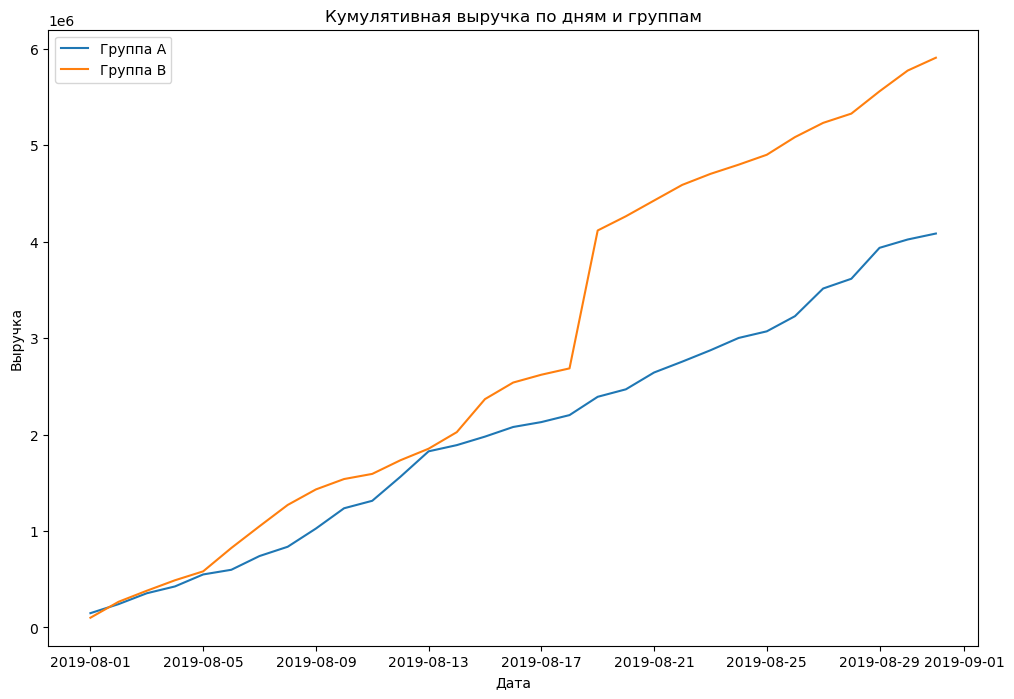

In [23]:
plt.figure(figsize=(12,8))

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')


plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам')
plt.show() 

Построю графики кумулятивной выручки по дням по группам, предварительно объявив переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраню данные о датах, выручке и числе заказов в группах A и B.
Из графика видно, что: 
* Показатель выручки группы В выше весь период исследования.
* Так же стоит отметить заметный прирост выручки 21.08.2019. Возможно, в этот день было куплен большой объем товаров, либо товары (товар) с высокой ценой. Так же можно предполоить, что товары, продаваемые в данном интернет-магазине имеют определённую сезонную специфику (например, обогреватели или вентиляторы).

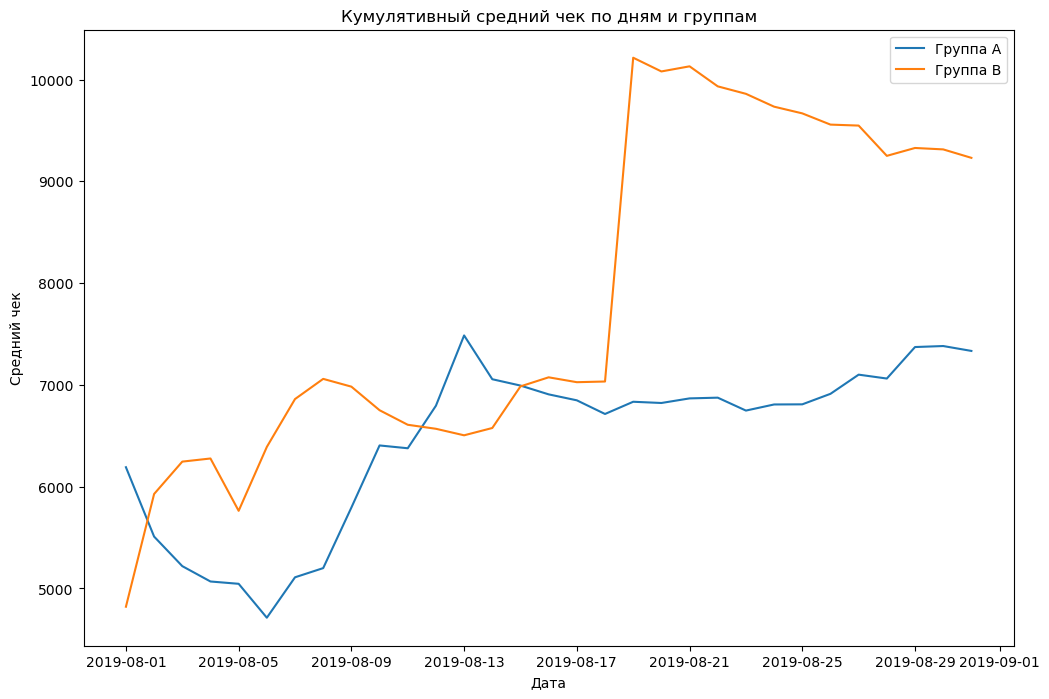

In [24]:
plt.figure(figsize=(12,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам')
plt.show(); 

Построю график кумулятивного среднего чека. Графики групп А и В ведут себя не однородно. 
* Размер среднего чека группы А падает вплодь до 05.08.2019, далее начинается постепенный прирост.
* После 17.02.2019 наблюдается резкий прирост значения среднего чека в группе В. Как уже говорила ранее, причин может быть несколько: покупались высокомаржинальны товары, увличилось количество товаров в чеке. 

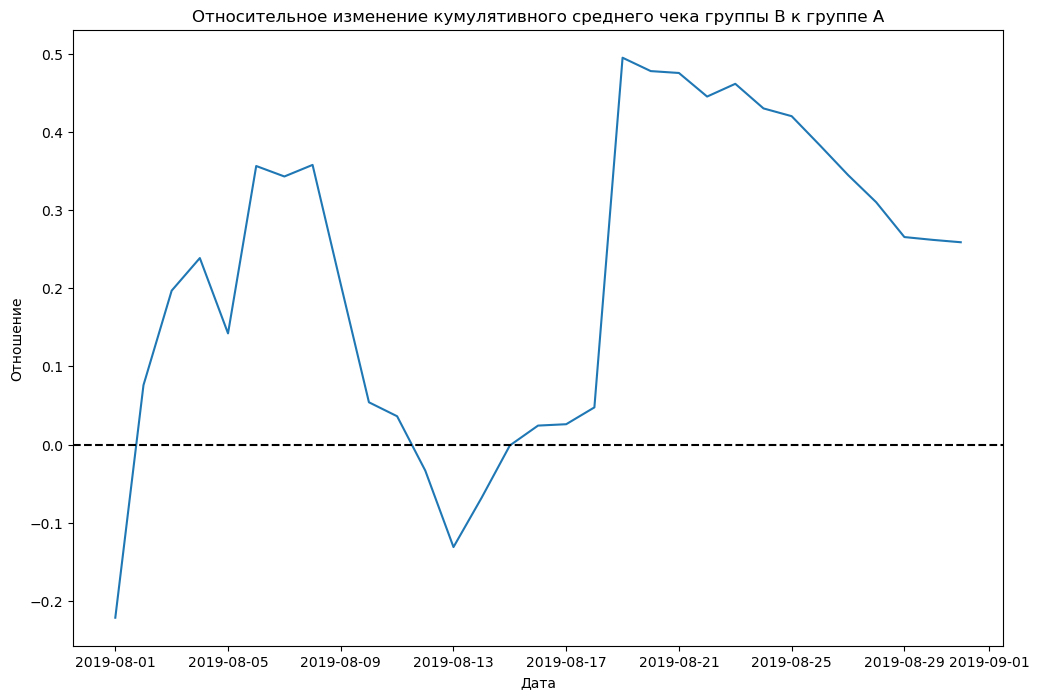

In [25]:
plt.figure(figsize=(12,8))

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.show(); 

Рассмотрим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. В нескольких точках график различия между сегментами резко «скачет». Где-то точно спрятаны крупные заказы и выбросы.

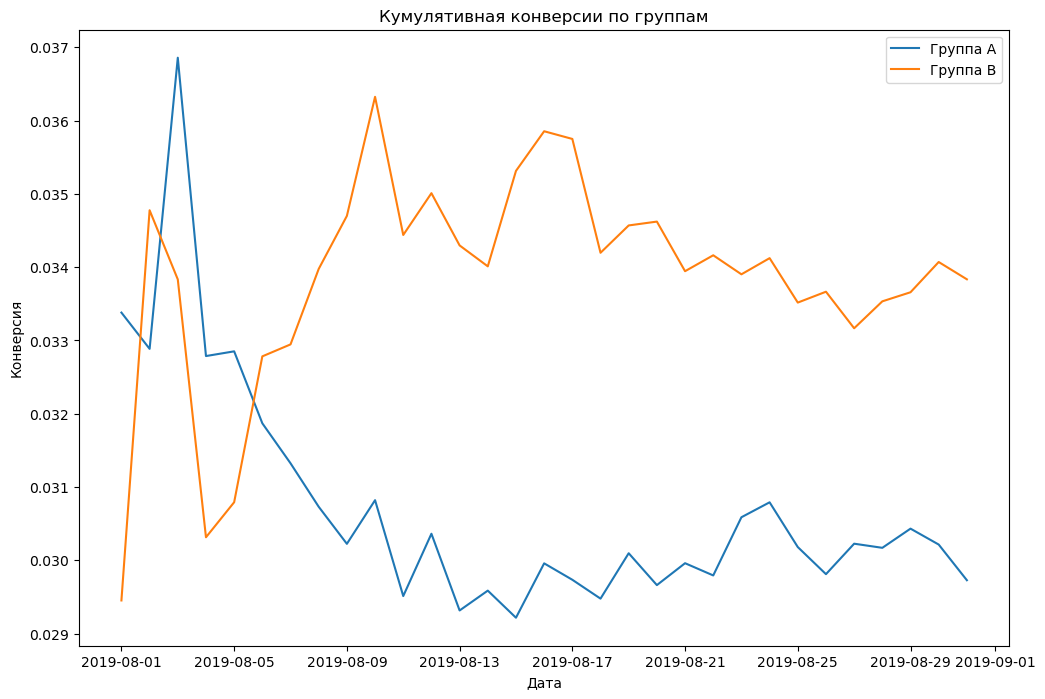

In [26]:
plt.figure(figsize=(12,8))

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(['Группа А', 'Группа B'])
plt.xlabel('Дата')
plt.ylabel('Конверсия') 
plt.title('Кумулятивная конверсии по группам')
plt.show();

Построю график кумулятивного среднего количества заказов на посетителя по группам.
Кумулятивные конверсии по группам А и В в начале исследования ведут себя не однородно, наблюдаются резкие скачки и падения. Далее (после 09.08.2019) чётко понятно, что комулятивная конверсия группы В значительно выше конверсии группы А: изменения влияют на поведение потребителей в лучшую сторону - количество заказов увеличивается.

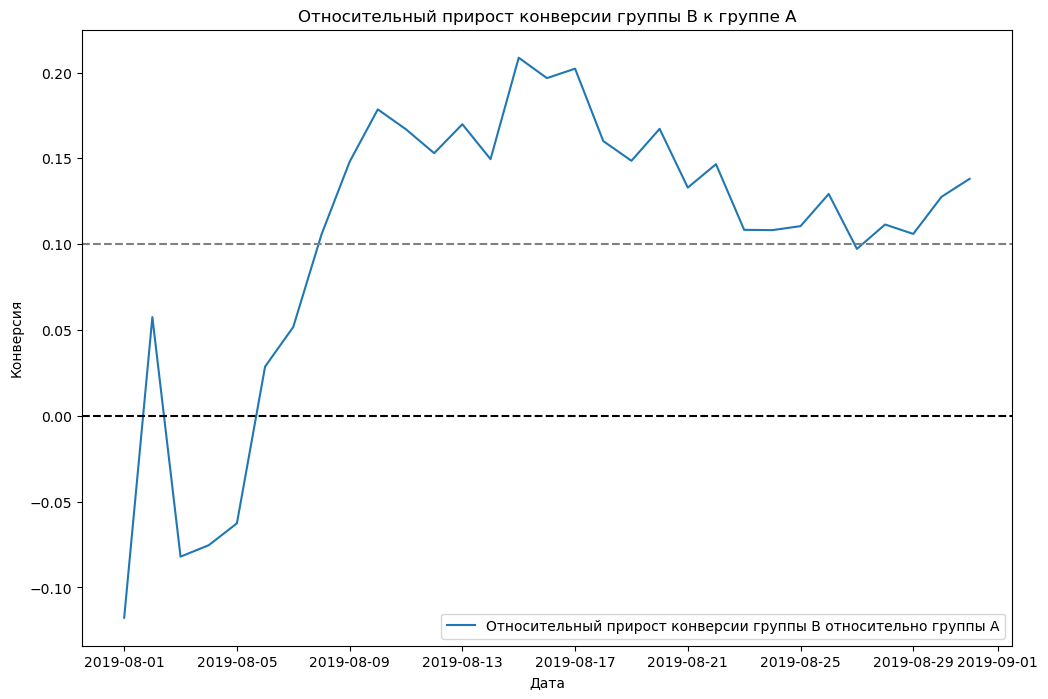

In [27]:
plt.figure(figsize=(12,8))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.1, color='grey', linestyle='--')

plt.ylabel('Конверсия') 
plt.xlabel('Дата') 
plt.title('Относительный прирост конверсии группы В к группе А') 
plt.show();

Построю график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
В начале теста группа B значительно проигрывает группе A. Далее наблюдается резкий скачок до 0,05 и опять резкое падение практически до - 0,1. Позже конверсия уверенно начинает расти и перерастает отметку в 0,2.

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


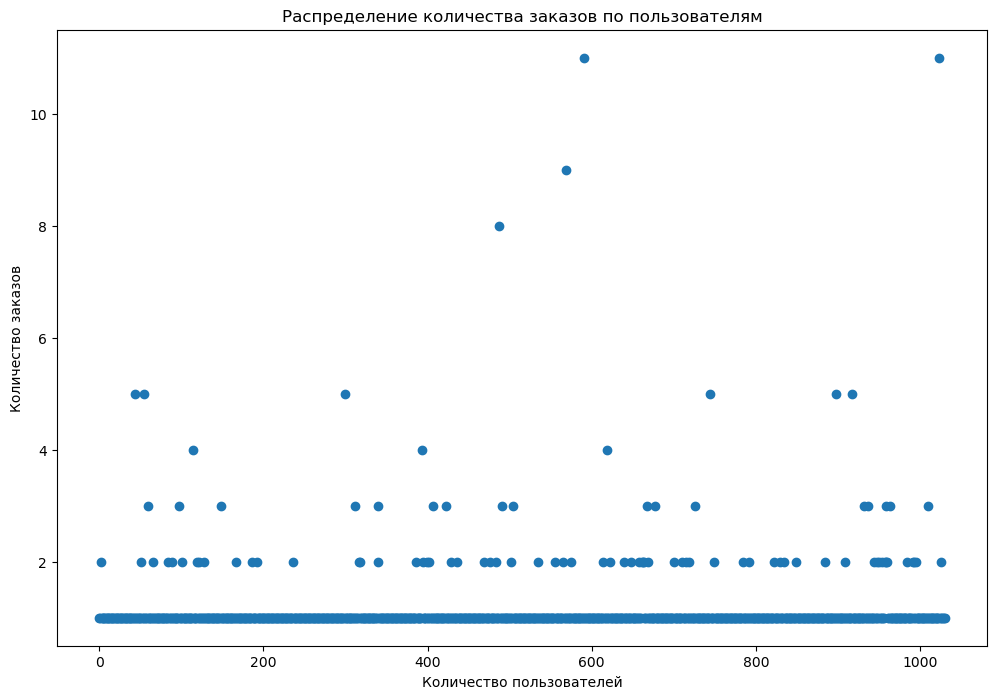

In [28]:
plt.figure(figsize=(12,8)) 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Распределение количества заказов по пользователям') 
plt.show(); 

Построю точечный график количества заказов по пользователям.
Большая часть пользователей совершают по 1-2 заказа. Так же достаточно много пользователей совершивших 3 заказа за период наблюдения. Есть группа активных пользователей, совершивших более 10 заказов. Но, в общей массе, это аномальные значения.

In [29]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
print(np.percentile(ordersByUsers['orders'], [95, 99]))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
[2. 4.]


Посчитаю 95-й и 99-й перцентили количества заказов на пользователя. 
Границей для аномальный пользователей в данном случае будет 3 заказа, т.к. исходя из полученных значений, 95% пользователей сделали не более 2-х заказов, и только 1% всех пользователей совершили 4 и более заказа.

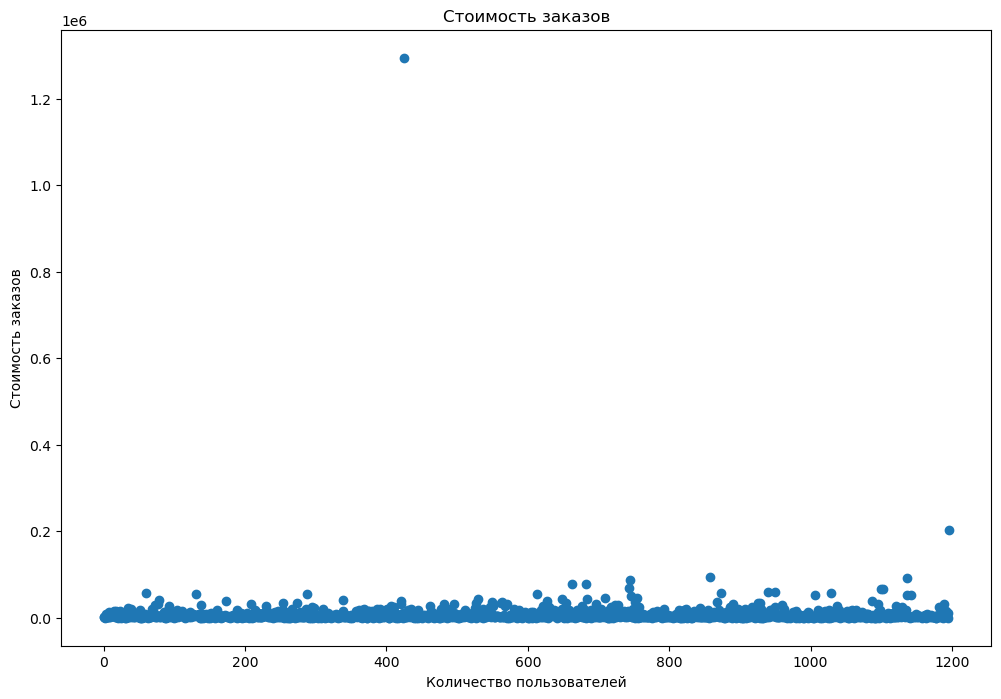

In [30]:
plt.figure(figsize=(12,8))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов') 
plt.xlabel('Количество пользователей') 
plt.title('Стоимость заказов') 
plt.show(); 

Построю точечный график стоимостей заказов. На графике наглядно видно, что большая часть заказов не превышает 100 тыс. рублей. Установим это как максимальное значение для определения аномалий.

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Посчитаю 95-й и 99-й перцентили стоимости заказов. 
Основная часть пользователей (95%) сделали заказы не дороже 28 тыс. рублей. И только 1% пользователей заказали на 58 тысяч и выше. Границей для аномальных значений в данном случае будет 28 тыс. рублей.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
 
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')

[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [33]:
print('p-value равняется {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Отношение конверсии группы В к группе А равно {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value равняется 0.01679
Отношение конверсии группы В к группе А равно 0.138


Посчитала статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

* H0 - различий в конверсии по среднему количеству чеков между группами нет;
* Н1 - различий в конверсиях о среднему количеству чеков между группами есть.

Т.к. p-value менее 0.05 (в наших данных он равен 0,016) Н0 отвергаем.

Отношение конверсии группы В к группе А равно 0,138, что говорит о положительных изменениях (приросте) после внедрения нововведений.

In [34]:
print('p-value равняется {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение конверсии группы В к группе А равно {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value равняется 0.729
Отношение конверсии группы В к группе А равно 0.259


Посчитала статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

* H0 - различий в среднем чеке заказа между группами нет;
* Н1 - различия в среднем чеке заказа между группами есть.

Т.к. p-value более 0.05 (в наших данных он равен 0,729) Н0 отвергнуть не можем.

Отношение конверсии группы В к группе А равен 0,259.


In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
63


Число пользователей с аномальными значениями равняется 63. Это может повлять на конечный результат, необходимо их удалить.

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value равен {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение конверсии группы В к группе А равно {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value равен 0.018
Отношение конверсии группы В к группе А равно 0.148


Убираем аномальные значения и считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

* H0 - различий в конверсии по среднему количеству чеков между группами нет;
* Н1 - различий в конверсиях о среднему количеству чеков между группами есть.

Т.к. p-value меньше 0.05 (в наших данных он равен 0,018) Н0 можем отвергнуть.

Отношение конверсии группы В к группе А равен 0,148.

После "очещения" данных так же лидируют пользователи группы В.

In [37]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.977
-0.017


Так же повторно тестируем гипотезы с различиями в среднем чеке по группам.

* H0 - различий в среднем чеке заказа между группами нет;
* Н1 - различия в среднем чеке заказа между группами есть.

Т.к. p-value значительно больше 0.05 (в наших данных он равен 0,977) Н0 отвергнуть не можем.

Отношение конверсии группы В к группе А отрицательное - 0,017.

## Общий вывод

Считаю, что продолжать тест смысла нет: группа B статистически значимо лучше группы A по обеим метрикам, а график конверсии говорит о фиксации результата. 